## Investment Risk

### Import libraries, functions and classes

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt


Bad key axes.color_cycle in file /Users/esuabomdijemeni/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/ourstyle.mplstyle, line 3 ('axes.color_cycle: 19e7d8, e719ca, 191ce7, 101011, e51919, f0f214, 48f214, 1af033')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
tickers = ['PG','BEI.DE']

sec_data = pd.DataFrame()

for t in tickers:
    sec_data[t]= wb.DataReader(t, data_source='yahoo', start='2019-1-1')['Adj Close']
    

In [3]:
sec_data.tail()

,PG,BEI.DE
Date,,
2021-02-19,127.120003,85.080002
2021-02-22,126.580002,84.559998
2021-02-23,127.519997,85.279999
2021-02-24,127.660004,84.900002
2021-02-26,124.290001,82.739998


In [4]:
sec_returns = np.log(sec_data / sec_data.shift(1))

In [5]:
sec_normalised = sec_data*100 / sec_data.iloc[0]

<AxesSubplot:xlabel='Date'>

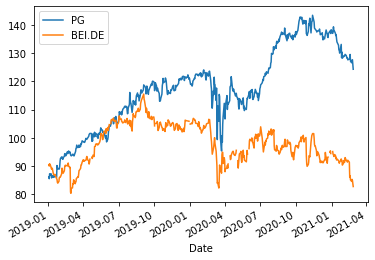

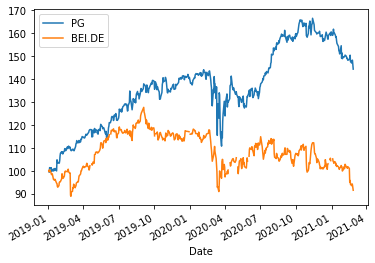

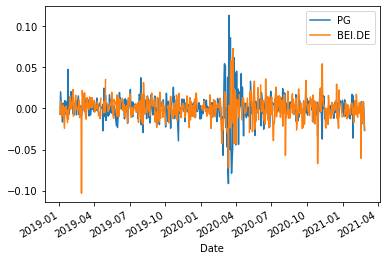

In [6]:
sec_data.plot()
sec_normalised.plot()
sec_returns.plot()

### PG

In [7]:
sec_returns['PG'].mean()

0.0006780651325720762

In [8]:
sec_returns['PG'].mean()*250

0.16951628314301906

In [9]:
sec_returns['PG'].std()

0.015889021018156237

In [10]:
sec_returns['PG'].std()*250**.5

0.2512274810383065

### Beiersdorf

In [11]:
sec_returns['BEI.DE'].mean()

-0.0002678765858760885

In [12]:
sec_returns['BEI.DE'].mean()*250

-0.06696914646902212

In [13]:
sec_returns['BEI.DE'].std()

0.014809328381974811

In [14]:
sec_returns['BEI.DE'].std()*250**.5

0.2341560415220824

### Varaince & Covariance

In [15]:
pg_var = sec_returns['PG'].var()
pg_var

0.00025246098891541064

In [17]:
bei_var = sec_returns['BEI.DE'].var()
bei_var

0.00021931620712516467

In [19]:
pg_var_a = sec_returns['PG'].var() * 250
pg_var_a

0.06311524722885266

In [21]:
bei_var_a = sec_returns['BEI.DE'].var() * 250
bei_var_a

0.05482905178129117

In [23]:
cov_matrix = sec_returns.cov()
cov_matrix

,PG,BEI.DE
PG,0.000252,0.000078
BEI.DE,0.000078,0.000219


In [24]:
cov_matrix_a = sec_returns.cov() * 250
cov_matrix_a

,PG,BEI.DE
PG,0.063115,0.019525
BEI.DE,0.019525,0.054829


In [27]:
corr_matrix = sec_returns.corr()
corr_matrix

,PG,BEI.DE
PG,1.000000,0.329791
BEI.DE,0.329791,1.000000
